_The main focus of this assignment is clustering from theoretical as well as practical perspective_

## Problem 1: Clustering (Manually)

For the following dataset, perform the clustering “by hand”:

17 28 50 60 80 89 150 167 171 189 
1. 	Use the K-means algorithm with K= 3 to cluster the data
2. 	Use hierarchical agglomerative clustering with single linkage to cluster the data
3. 	Use hierarchical agglomerative clustering with complete linkage to cluster the data
4. 	For K-means What will the final clusters be after 3 iterations if k=3 and the initial centers are 150, 171 and 189

_Note: Do not write code to answer this question_

### Solution
### Problem 1

Given the data set above, we'll use the K-means clustering algorithm with K = 3 to cluster the data. There are different methods for selecting the initial cluster centroids, so we'll go with the method taught in class. That is, randomly pick three numbers to be the starting centroids.

Numbers: [17 28 50 60 80 89 150 167 171 189]

The initial cluster centroids are randomly chosen to be from the 1st, 3rd, and 8th number:

Cluster 1: 17

Cluster 2: 50

Cluster 3: 167

From this, we reassign each number to the closest centroid

Cluster: [ 1 1 2 2 2 2 3 3 3 3 ]

Now, we recompute the centroids:

Cluster 1: 22.5

Cluster 2: 69.75

Cluster 3: 169.25

Cluster: [ 1 1 2 2 2 2 3 3 3 3 ]

These clusters are unchanged from the first iteration, so we're done. The clusters are:

[17 28] [50 60 80 89] [150 167 171 189]

### Problem 2

Instead of k-means, we'll now use hierarchical clustering (ISLR Algorithm 10.2) with single linkage distance measurement. Single linkage means that the minimum distance between two points in a cluster will be used as a measure. We'll use brackets [ ] to group numbers together.

To start, we assume each point is its own cluster:

17 28 50 60 80 89 150 167 171 189

The two closest points are 167 and 171 (distance of 4), so we'll group them together:

17 28 50 60 80 89 150 [167 171] 189

Now, the two closest points are 80 and 89 (distance of 9):

17 28 50 60 [80 89] 150 [167 171] 189

We'll repeat this process until there is only one cluster left:

17 28 [50 60] [80 89] 150 [167 171] 189 (min distance 10)

[17 28] [50 60] [80 89] 150 [167 171] 189 (min distance 11)

[17 28] [50 60] [80 89] [150 167 171] 189 (min distance 17)

[17 28] [50 60] [80 89] [150 167 171 189] (min distance 18)

[17 28] [50 60 80 89] [150 167 171 189] (min distance 20)

[17 28 50 60 80 89] [150 167 171 189] (min distance 22)

[17 28 50 60 80 89 150 167 171 189] (min distance 61)

### Problem 3

Now we'll use hierarchical clustering with complete linkage distance measurement. Complete linkage means that the maximum distance between two points in a cluster will be used as a measure. As before, we'll use brackets [ ] to group numbers together. This problem will proceed in a similar manner to Problem 2 until most clusters contain more than one number.

To start, we again assume each point is its own cluster:

17 28 50 60 80 89 150 167 171 189

The two closest points are 167 and 171 (distance of 4), so we'll group them together:

17 28 50 60 80 89 150 [167 171] 189

Now, the two closest points are 80 and 89 (distance of 9):

17 28 50 60 [80 89] 150 [167 171] 189

We'll repeat this process until there is only one cluster left:

17 28 [50 60] [80 89] 150 [167 171] 189 (max distance 10)

[17 28] [50 60] [80 89] 150 [167 171] 189 (max distance 11)

[17 28] [50 60] [80 89] [150 167 171] 189 (max distance 21)

[17 28] [50 60 80 89] [150 167 171] 189 (max distance 39)

[17 28] [50 60 80 89] [150 167 171 189] (max distance 39)

[17 28 50 60 80 89] [150 167 171 189] (max distance 72)

[17 28 50 60 80 89 150 167 171 189] (max distance 172)

These clusters formed more or less the same as in the single linkage case.

### Problem 4

Here, we'll repeat the k-means exercise but now with initital centroids of 150, 171, 189.

Numbers: [17 28 50 60 80 89 150 167 171 189] (iteration 1):

Cluster 1: 150

Cluster 2: 171

Cluster 3: 189

Clusters: [ 1 1 1 1 1 1 1 2 2 3 ]

Now, we recompute the centroids (iteration 2):

Cluster 1: 67.71

Cluster 2: 169

Cluster 3: 189

Clusters: [ 1 1 1 1 1 1 2 2 2 3 ]

We recompute the centroids again (iteration 3):

Cluster 1: 54

Cluster 2: 162

Cluster 3: 189

Clusters: [ 1 1 1 1 1 1 2 2 2 3 ]

The cluster centroids haven't changed, so we're done. The final clusters are:

[17 28 50 60 80 89] [150 167 171] [189]

Note that these clusters are different from those obtained in our first implementation of k-means.

## Problem 2: Clustering (Code)

Use the dataset of accepted papers at the AAAI 2014 conference to find clusters of papers using K-Means.

In [1]:
# Load the Relevant libraries
from sklearn.cluster import KMeans
import urllib
import pandas as pd

# URL for the AAAI (UW Repository)
url = "AAAI2014AcceptedPapers.csv"

# download the file
df = pd.read_csv(url)
print(df.shape)
# Lets take a look at the data
df.head()

(398, 6)


,title,authors,groups,keywords,topics,abstract
0,Kernelized Bayesian Transfer Learning,Mehmet Gönen and Adam A. Margolin,Novel Machine Learning Algorithms (NMLA),cross-domain learning\ndomain adaptation\nkern...,APP: Biomedical / Bioinformatics\nNMLA: Bayesi...,Transfer learning considers related but distin...
1,"""Source Free"" Transfer Learning for Text Class...","Zhongqi Lu, Yin Zhu, Sinno Pan, Evan Xiang, Yu...",AI and the Web (AIW)\nNovel Machine Learning A...,Transfer Learning\nAuxiliary Data Retrieval\nT...,AIW: Knowledge acquisition from the web\nAIW: ...,Transfer learning uses relevant auxiliary data...
2,A Generalization of Probabilistic Serial to Ra...,Haris Aziz and Paul Stursberg,Game Theory and Economic Paradigms (GTEP),social choice theory\nvoting\nfair division\ns...,GTEP: Game Theory\nGTEP: Social Choice / Voting,The probabilistic serial (PS) rule is one of t...
3,Lifetime Lexical Variation in Social Media,"Liao Lizi, Jing Jiang, Ying Ding, Heyan Huang ...",NLP and Text Mining (NLPTM),Generative model\nSocial Networks\nAge Prediction,AIW: Web personalization and user modeling\nNL...,As the rapid growth of online social media att...
4,Hybrid Singular Value Thresholding for Tensor ...,"Xiaoqin Zhang, Zhengyuan Zhou, Di Wang and Yi Ma",Knowledge Representation and Reasoning (KRR)\n...,tensor completion\nlow-rank recovery\nhybrid s...,KRR: Knowledge Representation (General/Other)\...,"In this paper, we study the low-rank tensor co..."


### 2.1) Vary the number of K from 2 to 6 and show if the results vary and assess the clusters obtained.

The data cannot be used in its raw form, we need to convert the text to some sort of numeric format so that distance measures can be used to form the clusters. A natural choice is to create a tf-idf (term frequency, inverse document frequency) matrix where each row is a paper and each column represents a word in the corpus. The tf-idf aspect weights each term relative to how often it appears in the current paper normalized by how many papers it appears in overall. This gives more weight to terms that appear often in only a few papers. We'll use the 'keywords' feature, as it captures the essential terms that describe the main ideas within each paper.

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_abstract = vectorizer.fit_transform(df['keywords'])
print(tfidf_abstract.shape)

(398, 1207)


The number of rows in the matrix corresponds to the number of papers, and the number of columns to the total number of unique words in all keyword lists. To get a sense of this, we can look at the head and tail of the vocabularly list created by parsing the keyword list for each paper.

In [3]:
vocab = vectorizer.get_feature_names()
# Look at head and tail of vocab
print(vocab[:10])
print(vocab[-10:])

[u'aadd', u'abduction', u'abductive', u'abox', u'absorption', u'abstraction', u'abstractions', u'access', u'acoustic', u'acquisition']
[u'wide', u'wikis', u'winner', u'winners', u'word', u'words', u'worst', u'writing', u'xml', u'zero']


Now, a k-means model will be generated using 2 to 6 clusters. For each cluster, within each model, we can print the top keywords for each cluster and the first five papers. The idea here is to see if there is a common theme within the cluster that is significantly different from the other clusters.

In [4]:
inertia = []
for nclust in range(2,7):
    model = KMeans(n_clusters=nclust, random_state=32779).fit(tfidf_abstract)
    clusters = model.labels_.tolist() # Cluster labels for each paper
    order_centroids = model.cluster_centers_.argsort()[:, ::-1] # Dominant terms
    inertia.append(model.inertia_)
    print('**** %i Clusters' % nclust)
    print('Top 10 terms for %i clusters:' % nclust)
    for i in range(nclust):
        print "Cluster %d:" % i,
        for ind in order_centroids[i, :10]:
            print ' %s' % vocab[ind],
        print
        print('First five papers in cluster:')
        print(df['keywords'][pd.Series(clusters) == i][0:5]) # Keyword lists for first five papers
    print

**** 2 Clusters
Top 10 terms for 2 clusters:
Cluster 0:  planning  social  search  model  game  optimization  computational  reasoning  theory  based
First five papers in cluster:
2    social choice theory\nvoting\nfair division\ns...
3    Generative model\nSocial Networks\nAge Prediction
4    tensor completion\nlow-rank recovery\nhybrid s...
5    Similarity Search\nApproximate Nearest Neighbo...
7    Online Classification\nVoted Dual Averaging Me...
Name: keywords, dtype: object
Cluster 1:  learning  multi  machine  supervised  reinforcement  classification  online  transfer  feature  semi
First five papers in cluster:
0     cross-domain learning\ndomain adaptation\nkern...
1     Transfer Learning\nAuxiliary Data Retrieval\nT...
6     constraint-based clustering\nmachine learning\...
9     supervised hashing\napproximate near neighbor ...
18    Cross-View Learning\nFeature Learning\nRandom ...
Name: keywords, dtype: object

**** 3 Clusters
Top 10 terms for 3 clusters:
Cluster 0:  lear

The results certainly vary as the number of clusters is increased. Similar topics exist from one iteration to the next, and the clusters generally become more distinct over time as sub-topics split into their own clusters, or merge with other similar sub-topics into new clusters.

Overall, the clustering process seems to be working as intended, as papers with similar topics are grouped into the same cluster. This is especially true as the number of clusters increases.

Let's look at the inertia (sum of squared distances from all samples to their respective cluster center) as a function of the number of clusters.

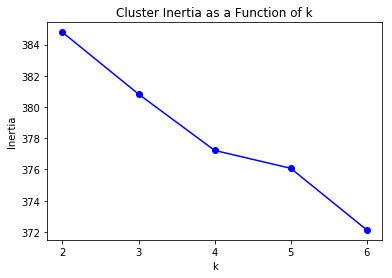

In [17]:
import matplotlib.pyplot as plt

xlim = range(2,7)
plt.plot(xlim,inertia,'bo-')
plt.xlabel('k')
plt.xticks(xlim)
plt.ylabel('Inertia')
plt.title('Cluster Inertia as a Function of k')
plt.show()

Note that the inertia hasn't reached the classic 'elbow point', that might give a sense of the optimal number of clusters for the paper data set. There is almost one when k equals four, as the change from four to five is somewhat negligible. However, the dropoff is significant again when k equals six.

### 2.2) Make a case regarding which clusters ‘make sense’ e.g., is there a cluster were papers on reinforcement learning are together vs. another cluster which has papers on deep learning.

Looking at the results, the papers from two and three clusters are too broad to make sense. This is somewhat intuitive, as there are probably more than two or three classes of papers among nearly 400 at a large conference.

With two clusters, the topics are very broad:
* The first covers papers about social networking, optimization, modeling, searching, and game theory
* The second covers papers about machine learning

With three clusters, the topics are still too broad:
* The first covers papers about machine learning
* The second covers papers about optimization, modeling, searching, and programming
* The third covers papers about social networking, computation, game theory, networking, and security

With four clusters, things finally start to 'make sense', to use the language from the problem description. Each cluster contains a set of topics that is somewhat unique relative to the other clusters:
* The first covers papers about game theory, search, and optimization
* The second covers papers about social networking
* The third covers papers about machine learning
* The fourth covers papers about probability, planning, and logic

With five clusters, things still make sense, although they are starting to get somewhat fractured. For example, there are two clusters dealing with machine learning, although they are somewhat separate areas:
* The first covers papers about searching and game theory
* The second covers papers about social networking and computations
* The third covers papers about supervised and reinforcement (semi-supervised) learning
* The fourth covers papers about optimization and constraints
* The fifth covers papers about machine learning, classification, kernels, and modeling

With six clusters, things still make sense, and the clusters seem less fractured than the solution for five clusters. There is now only one cluster regarding machine learning, and the set of topics within each cluster is again mostly unique relative to the other clusters:
* The first covers papers about networks, searching, and nearest neighbors
* The second covers papers about planning, and searching
* The third covers papers about game theory, optimizations, graphs, and security
* The fourth covers papers about machine learning, including classification and reinforcement
* The fifth covers papers about social networking and computation
* The sixth covers papers about probability, Markov processes, modeling, and logic

To summarize, if an ideal number of clusters had to be chosen, a good choice would be between four and six, as the groupings within these clusters makes sense. Using only two or three clusters results in too many unrelated topics within each cluster. Using between four and six clusters results in more sensical grouping within each cluster, as the topics are mostly unique relative to the other clusters. Caution should be used however, as increasing the number of clusters can lead to fractured topics (i.e., some clusters will contain similar topics that could be merged). For this exercise, six clusters is probably the best choice, as the topics are mostly unique and not too fractured. Also, the inertia plot from above indicates that convergence has not yet been reach with regard to the inertia as a function  the number of clusters, so it probably doesn't make sense to use less than 6 clusters.